In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
dataset = pd.read_csv('C:/Users/siric/OneDrive/Desktop/creditcard.csv')

<Axes: xlabel='Class', ylabel='count'>

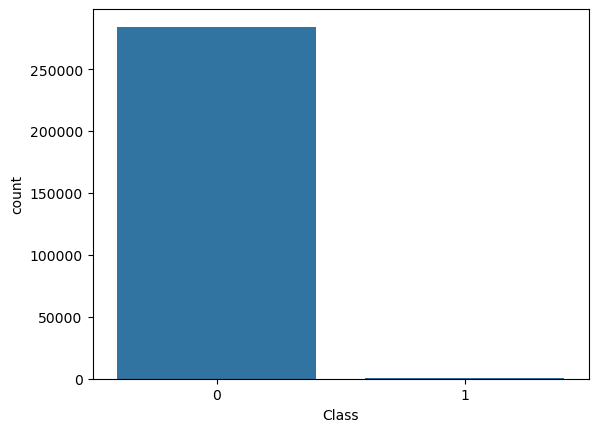

In [3]:
sns.countplot(x='Class', data=dataset)

In [4]:
positiveDataset = dataset.loc[dataset['Class'] == 1]
negativeDataset = dataset.loc[dataset['Class'] == 0]

In [6]:
positiveTrain, positiveTest = tts(positiveDataset, test_size=0.2, random_state=21)
negativeTrain, negativeTest = tts(negativeDataset, test_size=0.5)

# Concatenate DataFrames instead of using append
trainDataset = pd.concat([positiveTrain, negativeTrain], ignore_index=True)
testDataset = pd.concat([positiveTest, negativeTest], ignore_index=True)


In [7]:
def classifierCreator():
    clf = keras.models.Sequential()
    clf.add(keras.layers.Dense(10, activation='relu'))
    clf.add(keras.layers.Dense(5, activation='relu'))
    clf.add(keras.layers.Dense(1, activation='sigmoid'))
    return clf

In [8]:
classifier = classifierCreator()
classifier.compile(loss='binary_crossentropy', optimizer='sgd')
yTrain = trainDataset['Class']
yTest = testDataset['Class']
xTrain = trainDataset.drop(columns=['Class'])
xTest = testDataset.drop(columns=['Class'])
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [14]:
weights = {0:1, 1:1.5}
history = classifier.fit(xTrain, yTrain, class_weight=weights, epochs=15, verbose=0)

In [16]:
# Get predicted probabilities
predProbTrain = classifier.predict(xTrain)

# Convert probabilities to class labels
# For binary classification, use a threshold (e.g., 0.5)
predTrain = (predProbTrain > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(yTrain, predTrain))
print('ROC AUC Score: ', roc_auc_score(yTrain, predProbTrain))


4455/4455 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.93      0.80      0.86       393

    accuracy                           1.00    142550
   macro avg       0.96      0.90      0.93    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.988491830011047


In [18]:
# Get predicted probabilities for the test set
predProbTest = classifier.predict(xTest)

# Convert probabilities to class labels
# For binary classification, use a threshold (e.g., 0.5)
predTest = (predProbTest > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(yTest, predTest))
print('ROC AUC Score: ', roc_auc_score(yTest, predProbTest))


4446/4446 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.71      0.78      0.74        99

    accuracy                           1.00    142257
   macro avg       0.85      0.89      0.87    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.9678330598433582


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

for i in range(1, 10, 1):
    print('Ratio of weights: 1:', 1 + (i * 0.01))
    classifier = classifierCreator()
    classifier.compile(loss='binary_crossentropy', optimizer='sgd')

    # Update weights for class imbalance
    weights = {0: 1, 1: 1 + (i * 0.01)}

    # Train the model
    history = classifier.fit(xTrain, yTrain, class_weight=weights, epochs=15, verbose=0)

    # Predict on training data
    predProbTrain = classifier.predict(xTrain)  # Get predicted probabilities
    predTrain = (predProbTrain > 0.5).astype(int)  # Convert probabilities to class labels

    # Print classification report and ROC AUC score for training data
    print(classification_report(yTrain, predTrain))
    print('ROC AUC Score (Train): ', roc_auc_score(yTrain, predProbTrain))

    # Predict on test data
    predProbTest = classifier.predict(xTest)  # Get predicted probabilities
    predTest = (predProbTest > 0.5).astype(int)  # Convert probabilities to class labels

    # Print classification report and ROC AUC score for test data
    print(classification_report(yTest, predTest))
    print('ROC AUC Score (Test): ', roc_auc_score(yTest, predProbTest))



Ratio of weights: 1: 1.01
